In [ ]:
import numpy as np
from PIL import Image, ImageChops
import sys
import matplotlib.pyplot as plt
import math
import pdb

In [3]:
# make sure the image is in the current working directory!
lTestImg = Image.open("test_image_grayscale.png") # this has all 3 channels with same values for each pixel
lTestImgGrayMat = np.asarray(lTestImg.convert('L'))
print(lTestImgGrayMat.shape)
print(lTestImgGrayMat)
plt.imshow(lTestImgGrayMat, cmap='gray')
plt.title("original image")

FileNotFoundError: [Errno 2] No such file or directory: 'test_image_grayscale.png'

# **Linear Operations**

Helper Functions for all four basic arithmetic operations

In [ ]:
# my own add functions (subtract by adding negative)
def fImageMatrixArithmetic (aMatrix1, aMatrix2, aOperation='add', aUintType=256):
  lNewMatrix = aMatrix1.copy()
  lRows, lCols = np.shape(aMatrix1)
  for i in range(0, lRows):
    for j in range(0, lCols):
      if aOperation == 'add':
        lResult = aMatrix1[i,j] + aMatrix2[i,j]
      elif aOperation == 'subtract':
        lResult = aMatrix1[i,j] - aMatrix2[i,j]
      elif aOperation == 'multiply':
        lResult = aMatrix1[i,j] * aMatrix2[i,j]
      elif aOperation == 'divide':
        lResult = aMatrix1[i,j] / aMatrix2[i,j]
      if lResult >= aUintType:
        lNewMatrix[i,j] = aUintType-1 # maxes out at max value
      elif lResult < 0:
        lNewMatrix[i,j] = 0 # mins out at min value
      else:
        lNewMatrix[i,j] = lResult
  return lNewMatrix

def fImageMatrixArithmeticByConstant (aMatrix1, aConstant, aOperation='add', aUintType=256):
  lRows, lCols = np.shape(aMatrix1)
  lMatrixOfConstant = np.full((lRows, lCols,), aConstant) # makes matrix of image dimensions with all same constant values
  return fImageMatrixArithmetic(aMatrix1, lMatrixOfConstant, aOperation=aOperation)

# **Adding & Subtracting**

Remember: 0 = black, 255 = white

Adding by +X makes pixels lighter

Text(0.5, 1.0, 'add, X=-50')

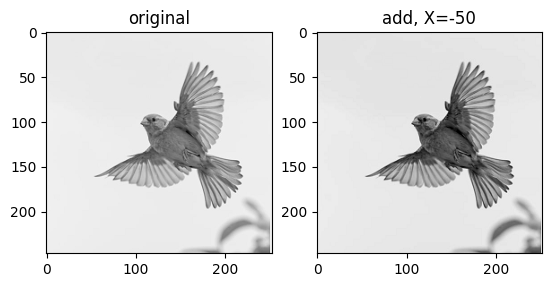

In [ ]:
X = -50
lOperation = 'add'
lAddedImage = fImageMatrixArithmeticByConstant(lTestImgGrayMat, aConstant=X, aOperation=lOperation)
#print(lAddedImage);

figure, axis = plt.subplots(1,2)
axis[0].imshow(lTestImgGrayMat, cmap='gray')
axis[0].set_title("original")
axis[1].imshow(lAddedImage, cmap='gray')
axis[1].set_title(f"{lOperation}, X={X}")

# **Negative of an image**

Max possible intensity value - current intensity value

In [ ]:
# my own negative function
def fImageMatrixNegative (aInputImage, aOperation='subtract', aUintType=256):
  lRows, lCols = np.shape(aInputImage)
  lMaxValueMatrix = np.full((lRows, lCols,), aUintType-1) # makes matrix of image dimensions with max valueas every element
  return fImageMatrixArithmetic(lMaxValueMatrix, aInputImage, aOperation='subtract')

Text(0.5, 1.0, 'Negative')

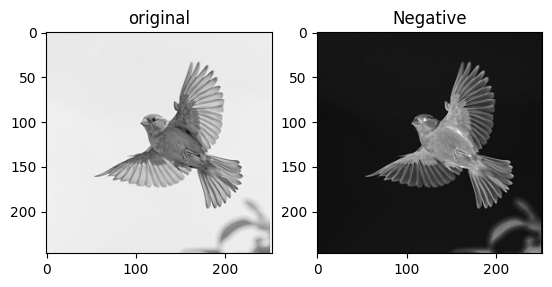

In [ ]:
lNegativeImage = fImageMatrixNegative(lTestImgGrayMat)
#print(lNegativeImage);

figure, axis = plt.subplots(1,2)
axis[0].imshow(lTestImgGrayMat, cmap='gray')
axis[0].set_title("original")
axis[1].imshow(lNegativeImage, cmap='gray')
axis[1].set_title(f"Negative")

# **Multiplying / Dividing**

Multiplying by +Y > 1 makes pixels lighter

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 210 255 255]
 [255 255 255 ... 204 255 255]
 [255 255 255 ... 192 255 255]]


Text(0.5, 1.0, 'multiply, Y=2')

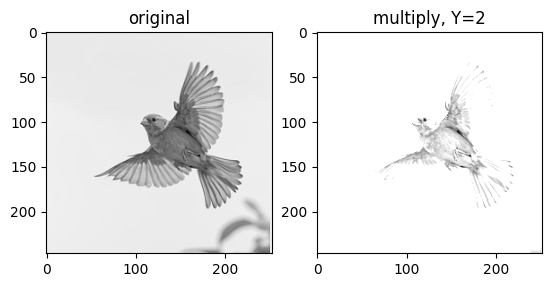

In [ ]:
Y = 2
lOperation = 'multiply'
lMultipliedImage = fImageMatrixArithmeticByConstant(lTestImgGrayMat, aConstant=Y, aOperation=lOperation)
print(lMultipliedImage)

figure, axis = plt.subplots(1,2)
axis[0].imshow(lTestImgGrayMat, cmap='gray')
axis[0].set_title("original")
axis[1].imshow(lMultipliedImage, cmap='gray')
axis[1].set_title(f"{lOperation}, Y={Y}")

# **Logarithmic Operation**

smaller c = narrower output range

In [ ]:
# logarithmic operations
def fImageMatrixLogOperation(aInputImgMatrix, aConstant, aUintType=256):
  # s = c*log(1+r) where r is each pixel in the image
  aNewMatrix = aInputImgMatrix.copy()
  lRows, lCols = np.shape(aInputImgMatrix)
  for i in range(0, lRows):
    for j in range(0, lCols):
      lResult = aConstant*math.log(1+aInputImgMatrix[i,j])
      if lResult >= aUintType:
        aNewMatrix[i,j] = aUintType-1 # maxes out at max value
      elif lResult < 0:
        aNewMatrix[i,j] = 0 # mins out at min value
      else:
        aNewMatrix[i,j] = lResult
  return aNewMatrix

Text(0.5, 1.0, 'Log Image, C=4')

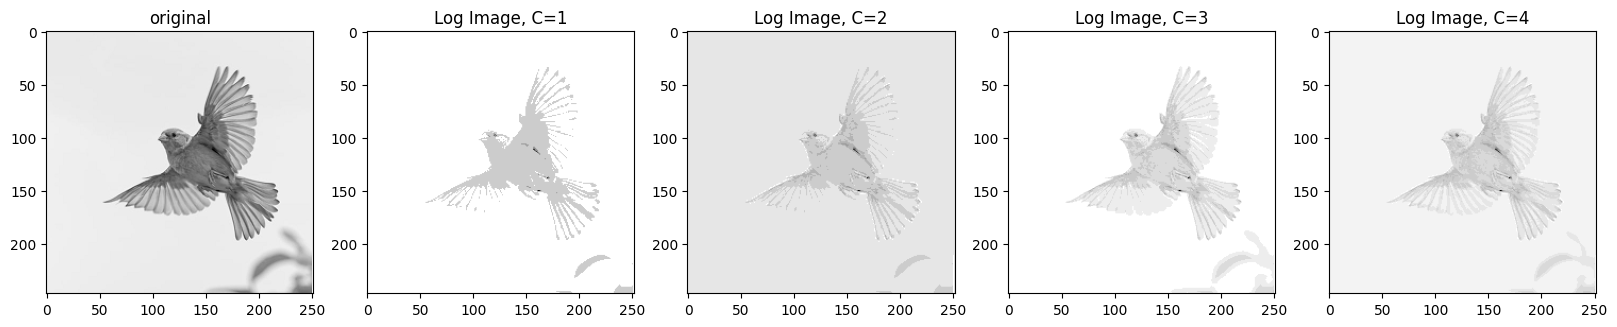

In [ ]:
C = [1,2,3,4]
lLogImage1 = fImageMatrixLogOperation(lTestImgGrayMat, aConstant=C[0])
lLogImage2 = fImageMatrixLogOperation(lTestImgGrayMat, aConstant=C[1])
lLogImage3 = fImageMatrixLogOperation(lTestImgGrayMat, aConstant=C[2])
lLogImage4 = fImageMatrixLogOperation(lTestImgGrayMat, aConstant=C[3])
#print(lLogImage1);

figure, axis = plt.subplots(1,5)
figure.set_figwidth(20)
figure.set_figheight(6)
axis[0].imshow(lTestImgGrayMat, cmap='gray')
axis[0].set_title("original")
axis[1].imshow(lLogImage1, cmap='gray')
axis[1].set_title(f"Log Image, C={C[0]}")
axis[2].imshow(lLogImage2, cmap='gray')
axis[2].set_title(f"Log Image, C={C[1]}")
axis[3].imshow(lLogImage3, cmap='gray')
axis[3].set_title(f"Log Image, C={C[2]}")
axis[4].imshow(lLogImage4, cmap='gray')
axis[4].set_title(f"Log Image, C={C[3]}")

# **Power Law Operations - Gamma Correction**

s = c*r^g (c scales each pixel, g increases each pixel in a power)

changes contrast settings of an image

In [ ]:
# power operations
def fImageMatrixPowerOperation(aInputImgMatrix, aConstant, aGammaLevel, aUintType=256):
  # s = c*r^g where r is each pixel in the image
  aNewMatrix = aInputImgMatrix.copy()
  lRows, lCols = np.shape(aInputImgMatrix)
  for i in range(0, lRows):
    for j in range(0, lCols):
      lResult = aConstant*math.pow(aInputImgMatrix[i,j], aGammaLevel)
      if lResult >= aUintType:
        aNewMatrix[i,j] = aUintType-1 # maxes out at max value
      elif lResult < 0:
        aNewMatrix[i,j] = 0 # mins out at min value
      else:
        aNewMatrix[i,j] = lResult
  return aNewMatrix

[[233 233 233 ... 236 240 240]
 [233 233 233 ... 236 240 240]
 [233 233 233 ... 236 240 240]
 ...
 [238 238 238 ... 105 254 240]
 [238 238 238 ... 102 255 240]
 [238 238 238 ...  96 255 240]]


Text(0.5, 1.0, 'Power, C=2, G=1.25')

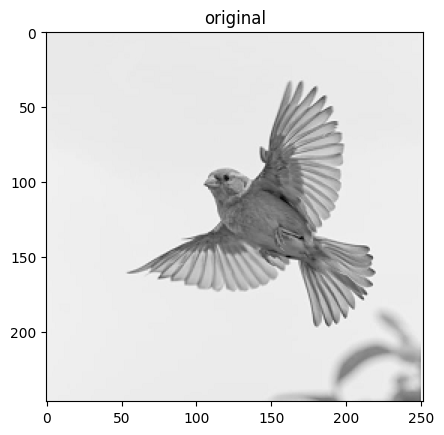

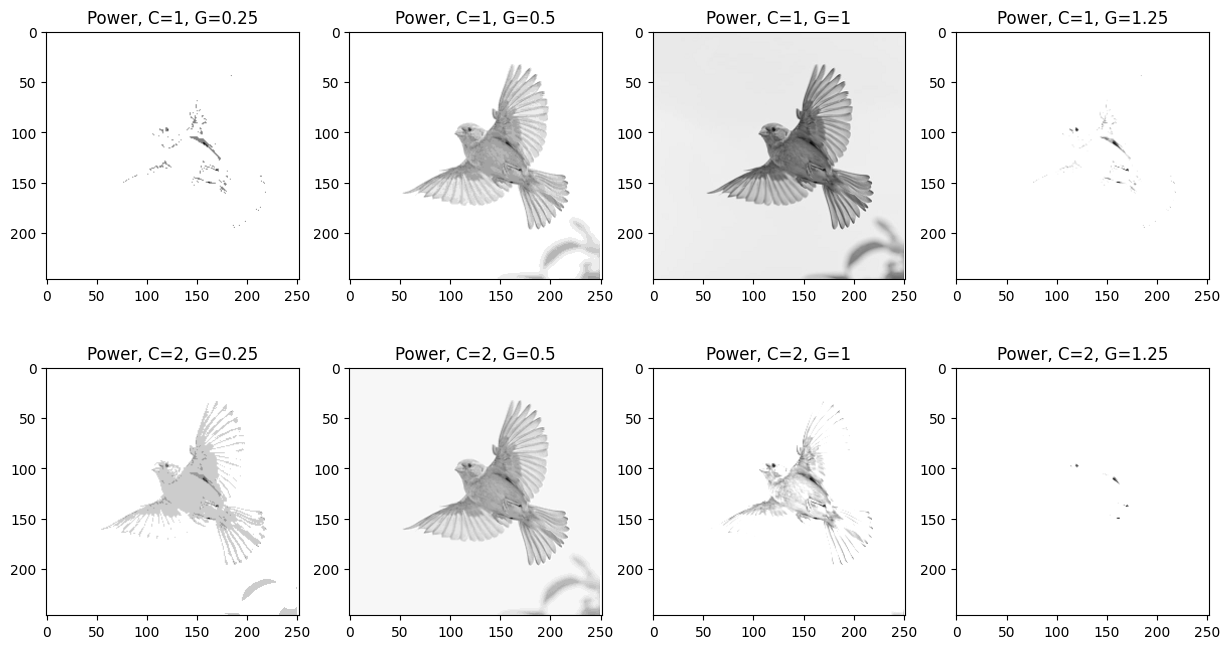

In [ ]:
C = [1, 2]
G = [0.25, 0.5, 1, 1.25]
lGammaImage1 = fImageMatrixPowerOperation(lTestImgGrayMat, aConstant=C[0], aGammaLevel=G[0])
lGammaImage2 = fImageMatrixPowerOperation(lTestImgGrayMat, aConstant=C[0], aGammaLevel=G[1])
lGammaImage3 = fImageMatrixPowerOperation(lTestImgGrayMat, aConstant=C[0], aGammaLevel=G[2])
lGammaImage4 = fImageMatrixPowerOperation(lTestImgGrayMat, aConstant=C[0], aGammaLevel=G[3])
lGammaImage5 = fImageMatrixPowerOperation(lTestImgGrayMat, aConstant=C[1], aGammaLevel=G[0])
lGammaImage6 = fImageMatrixPowerOperation(lTestImgGrayMat, aConstant=C[1], aGammaLevel=G[1])
lGammaImage7 = fImageMatrixPowerOperation(lTestImgGrayMat, aConstant=C[1], aGammaLevel=G[2])
lGammaImage8 = fImageMatrixPowerOperation(lTestImgGrayMat, aConstant=C[1], aGammaLevel=G[3])
#print(lLogImage1);

print(lTestImgGrayMat)
plt.imshow(lTestImgGrayMat, cmap='gray')
plt.title("original")

figure, axis = plt.subplots(2,4)
figure.set_figwidth(15)
figure.set_figheight(8)
axis[0,0].imshow(lGammaImage1, cmap='gray')
axis[0,0].set_title(f"Power, C={C[0]}, G={G[0]}")
axis[0,1].imshow(lGammaImage2, cmap='gray')
axis[0,1].set_title(f"Power, C={C[0]}, G={G[1]}")
axis[0,2].imshow(lGammaImage3, cmap='gray')
axis[0,2].set_title(f"Power, C={C[0]}, G={G[2]}")
axis[0,3].imshow(lGammaImage4, cmap='gray')
axis[0,3].set_title(f"Power, C={C[0]}, G={G[3]}")
axis[1,0].imshow(lGammaImage5, cmap='gray')
axis[1,0].set_title(f"Power, C={C[1]}, G={G[0]}")
axis[1,1].imshow(lGammaImage6, cmap='gray')
axis[1,1].set_title(f"Power, C={C[1]}, G={G[1]}")
axis[1,2].imshow(lGammaImage7, cmap='gray')
axis[1,2].set_title(f"Power, C={C[1]}, G={G[2]}")
axis[1,3].imshow(lGammaImage8, cmap='gray')
axis[1,3].set_title(f"Power, C={C[1]}, G={G[3]}")

# **Contrast Operations**

Contrast: difference in intensity values between pixels. Low contrast = intensity values are close to each other. High contrast = intensity values are far apart from each other.

a(r-s)+s where a and s are constants (the +s is an offset, optional)

*   s: controls the difference
*   a: scales the difference

a>1 contrast augmentation, 0<a<1 contrast reduction

In [ ]:
# contrast operations
def fImageMatrixContrastOperation(aInputImgMatrix, aConstantA, aConstantS, aUintType=256):
  # newpx = a(r-s)+s
  aNewMatrix = aInputImgMatrix.copy()
  lRows, lCols = np.shape(aInputImgMatrix)
  for i in range(0, lRows):
    for j in range(0, lCols):
      lResult = aConstantA*(aInputImgMatrix[i,j]-aConstantS)#-aConstantS
      if lResult >= aUintType:
        aNewMatrix[i,j] = aUintType-1 # maxes out at max value
      elif lResult < 0:
        aNewMatrix[i,j] = 0 # mins out at min value
      else:
        aNewMatrix[i,j] = lResult
  return aNewMatrix

Text(0.5, 1.0, 'Contrast, A=5, S=50')

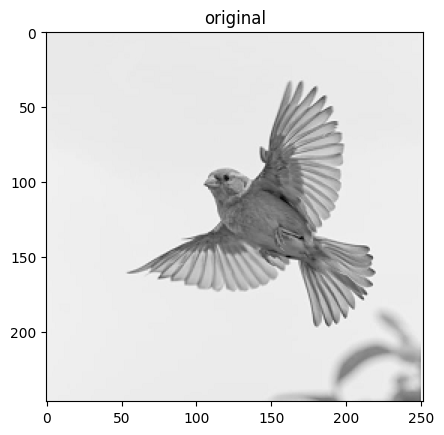

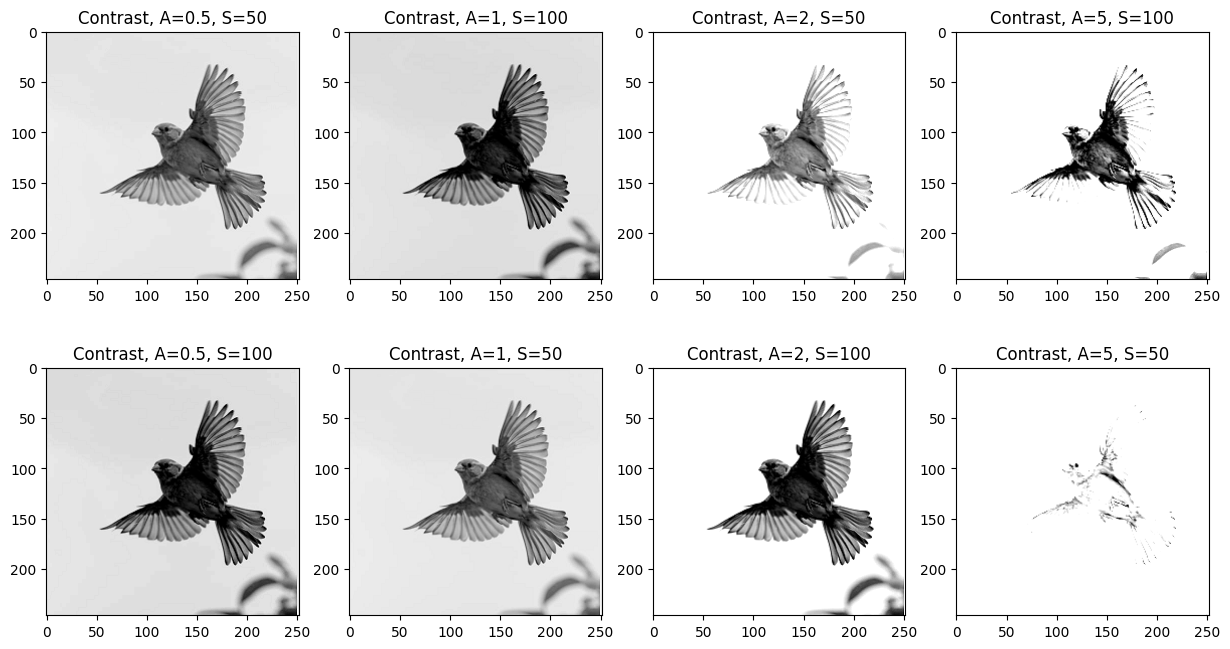

In [ ]:
S = [50, 100]
A = [0.5, 1, 2, 5]
lContrastImage1 = fImageMatrixContrastOperation(lTestImgGrayMat, aConstantA=A[0], aConstantS=S[0])
lContrastImage2 = fImageMatrixContrastOperation(lTestImgGrayMat, aConstantA=A[1], aConstantS=S[1])
lContrastImage3 = fImageMatrixContrastOperation(lTestImgGrayMat, aConstantA=A[2], aConstantS=S[0])
lContrastImage4 = fImageMatrixContrastOperation(lTestImgGrayMat, aConstantA=A[3], aConstantS=S[1])
lContrastImage5 = fImageMatrixContrastOperation(lTestImgGrayMat, aConstantA=A[0], aConstantS=S[1])
lContrastImage6 = fImageMatrixContrastOperation(lTestImgGrayMat, aConstantA=A[1], aConstantS=S[0])
lContrastImage7 = fImageMatrixContrastOperation(lTestImgGrayMat, aConstantA=A[2], aConstantS=S[1])
lContrastImage8 = fImageMatrixContrastOperation(lTestImgGrayMat, aConstantA=A[3], aConstantS=S[0])

plt.imshow(lTestImgGrayMat, cmap='gray')
plt.title("original")

figure, axis = plt.subplots(2,4)
figure.set_figwidth(15)
figure.set_figheight(8)
axis[0,0].imshow(lContrastImage1, cmap='gray')
axis[0,0].set_title(f"Contrast, A={A[0]}, S={S[0]}")
axis[0,1].imshow(lContrastImage2, cmap='gray')
axis[0,1].set_title(f"Contrast, A={A[1]}, S={S[1]}")
axis[0,2].imshow(lContrastImage3, cmap='gray')
axis[0,2].set_title(f"Contrast, A={A[2]}, S={S[0]}")
axis[0,3].imshow(lContrastImage4, cmap='gray')
axis[0,3].set_title(f"Contrast, A={A[3]}, S={S[1]}")
axis[1,0].imshow(lContrastImage5, cmap='gray')
axis[1,0].set_title(f"Contrast, A={A[0]}, S={S[1]}")
axis[1,1].imshow(lContrastImage6, cmap='gray')
axis[1,1].set_title(f"Contrast, A={A[1]}, S={S[0]}")
axis[1,2].imshow(lContrastImage7, cmap='gray')
axis[1,2].set_title(f"Contrast, A={A[2]}, S={S[1]}")
axis[1,3].imshow(lContrastImage8, cmap='gray')
axis[1,3].set_title(f"Contrast, A={A[3]}, S={S[0]}")

# **Contrast Thresholding**

Fixed value selected as threshold t. If r > t = 1, otherwise r value preserved.

Binary thresholded images are useful for masking later on

In [ ]:
# thresholding operations
def fImageMatrixContrastThresholding(aInputImgMatrix, aThresholdValue, aUintType=256, aReturnType='grayscale'):
  aNewMatrix = aInputImgMatrix.copy()
  lRows, lCols = np.shape(aInputImgMatrix)
  for i in range(0, lRows):
    for j in range(0, lCols):
      if aReturnType == 'binary':
        if aInputImgMatrix[i,j] > aThresholdValue:
          aNewMatrix[i,j] = 1 # if value above thresold, make it white
        else:
          aNewMatrix[i,j] = 0 # if value below or at threshold, make it black
      else: # if grayscale
        if aInputImgMatrix[i,j] > aThresholdValue:
          aNewMatrix[i,j] = aUintType-1 # if value is above threshold, set it to max value (white)
        else:
          aNewMatrix[i,j] = aInputImgMatrix[i,j] # if value is above or at threshold, keep it
  return aNewMatrix

def fImageMatrixMeanContrastTresholding(aInputImgMatrix, aUintType=256, aReturnType='grayscale'):
    return fImageMatrixContrastThresholding(aInputImgMatrix, np.mean(aInputImgMatrix), aUintType, aReturnType)

Text(0.5, 1.0, 'Threshold, T=175')

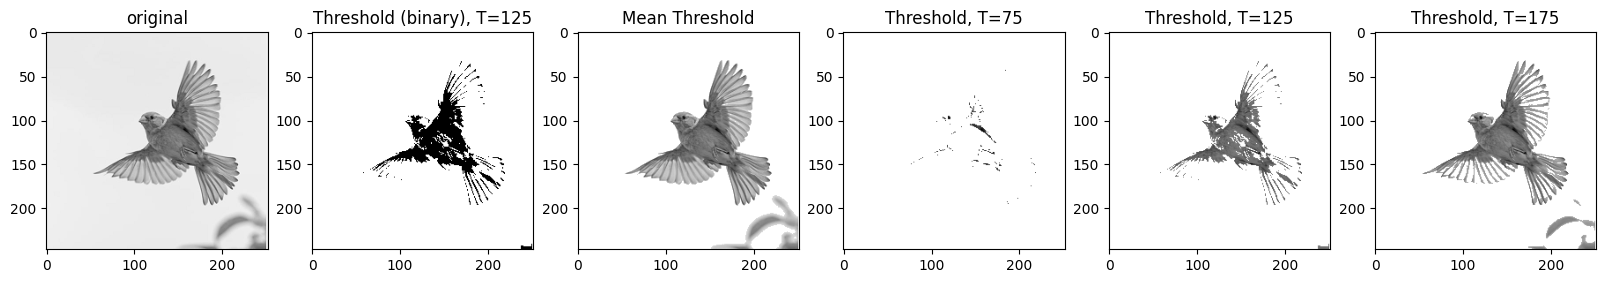

In [ ]:
T = [75, 125, 175]
lTresholdedImage1 = fImageMatrixContrastThresholding(lTestImgGrayMat, aThresholdValue=T[1], aReturnType='binary')
lTresholdedImage2 = fImageMatrixMeanContrastTresholding(lTestImgGrayMat)
lTresholdedImage3 = fImageMatrixContrastThresholding(lTestImgGrayMat, aThresholdValue=T[0])
lTresholdedImage4 = fImageMatrixContrastThresholding(lTestImgGrayMat, aThresholdValue=T[1])
lTresholdedImage5 = fImageMatrixContrastThresholding(lTestImgGrayMat, aThresholdValue=T[2])

figure, axis = plt.subplots(1,6)
figure.set_figwidth(20)
figure.set_figheight(6)
axis[0].imshow(lTestImgGrayMat, cmap='gray')
axis[0].set_title("original")
axis[1].imshow(lTresholdedImage1, cmap='gray')
axis[1].set_title(f"Threshold (binary), T={T[1]}")
axis[2].imshow(lTresholdedImage2, cmap='gray')
axis[2].set_title(f"Mean Threshold")
axis[3].imshow(lTresholdedImage3, cmap='gray')
axis[3].set_title(f"Threshold, T={T[0]}")
axis[4].imshow(lTresholdedImage4, cmap='gray')
axis[4].set_title(f"Threshold, T={T[1]}")
axis[5].imshow(lTresholdedImage5, cmap='gray')
axis[5].set_title(f"Threshold, T={T[2]}")

In [ ]:
# for future reference
mat = np.array([[0, 1], [0, 1], [0, 1]])
print(mat)
mat1 = mat[:,0]
print(mat1)

[[0 1]
 [0 1]
 [0 1]]
[0 0 0]
